# LISTA 1

### zadanie 1.
Bazując na bibliotece scipy.signal dostępnej dla języka Python wygeneruj następujące sygnały:
- Sinus
- Prostokątny
- Piłokształtny
- Świergotliwy
- Superpozycja funkcji sinus i cosinus z samodzielnie dobranymi parametrami
- Impuls jednostkowy

Zadanie dodatkowe: wygenerowane sygnały wyświetl w uporządkowany sposób korzystając z funkcji subplot. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, square, sawtooth, unit_impulse
import pandas as pd

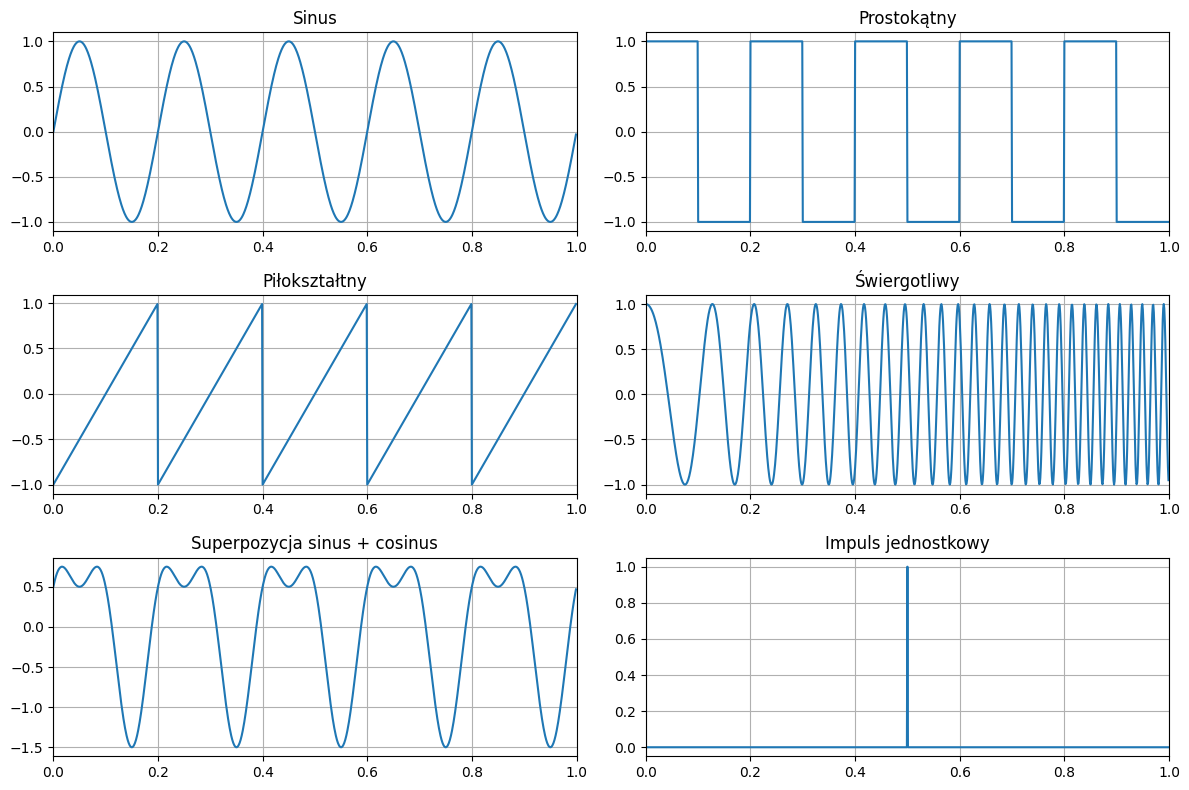

In [2]:
# Parametry sygnału
fs = 1000  # Częstotliwość próbkowania (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Oś czasu 1 sekunda

# a) Sygnał sinusoidalny
sin_wave = np.sin(2 * np.pi * 5 * t)  # 5 Hz

# b) Sygnał prostokątny
square_wave = square(2 * np.pi * 5 * t)  # 5 Hz

# c) Sygnał piłokształtny
sawtooth_wave = sawtooth(2 * np.pi * 5 * t)  # 5 Hz

# d) Sygnał świergotliwy (chirp)
chirp_wave = chirp(t, f0=5, f1=50, t1=1, method='linear')

# e) Superpozycja sinusa i cosinusa
superposition_wave = np.sin(2 * np.pi * 5 * t) + 0.5 * np.cos(2 * np.pi * 10 * t)

# f) Impuls jednostkowy
impulse_wave = unit_impulse(fs, idx=fs//2)

# Tworzenie wykresów
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Rysowanie sygnałów
axes[0, 0].plot(t, sin_wave)
axes[0, 0].set_title("Sinus")

axes[0, 1].plot(t, square_wave)
axes[0, 1].set_title("Prostokątny")

axes[1, 0].plot(t, sawtooth_wave)
axes[1, 0].set_title("Piłokształtny")

axes[1, 1].plot(t, chirp_wave)
axes[1, 1].set_title("Świergotliwy")

axes[2, 0].plot(t, superposition_wave)
axes[2, 0].set_title("Superpozycja sinus + cosinus")

axes[2, 1].plot(t, impulse_wave)
axes[2, 1].set_title("Impuls jednostkowy")

# Ustawienia wykresów
for ax in axes.flat:
    ax.set_xlim(0, 1)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Zad. 2. 
Korzystając z funkcji read_csv dostępnej w bibliotece pandas wczytaj wybrane plik CSV z zapisem dowolnego sygnału.

    Time    Signal
0  0.000  1.000000
1  0.001  0.999502
2  0.002  0.997991
3  0.003  0.995441
4  0.004  0.991829


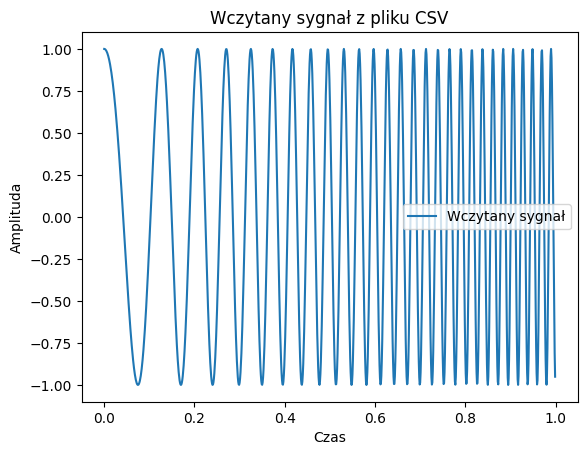

In [3]:
df_loaded = pd.read_csv('signal.csv')
print(df_loaded.head())

# Wykres wczytanego sygnału
plt.figure()
plt.plot(df_loaded['Time'], df_loaded['Signal'], label='Wczytany sygnał')
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Wczytany sygnał z pliku CSV")
plt.legend()
plt.show()

### Zad. 3. 
Korzystając z funkcji to_csv dostępnej w bibliotece pandas zapisz wybrany sygnał do pliku w formacie CSV

In [4]:
df = pd.DataFrame({'Time': t, 'Signal': sin_wave})
df.to_csv('signal_sinus.csv', index=False)

### Zad. 4 
Korzystając z funkcji rand i randn, które dostępne są w bibliotece NumPy, wygeneruj przebiegi czasowe. Wyznacz histogramy dla tych przebiegów. 

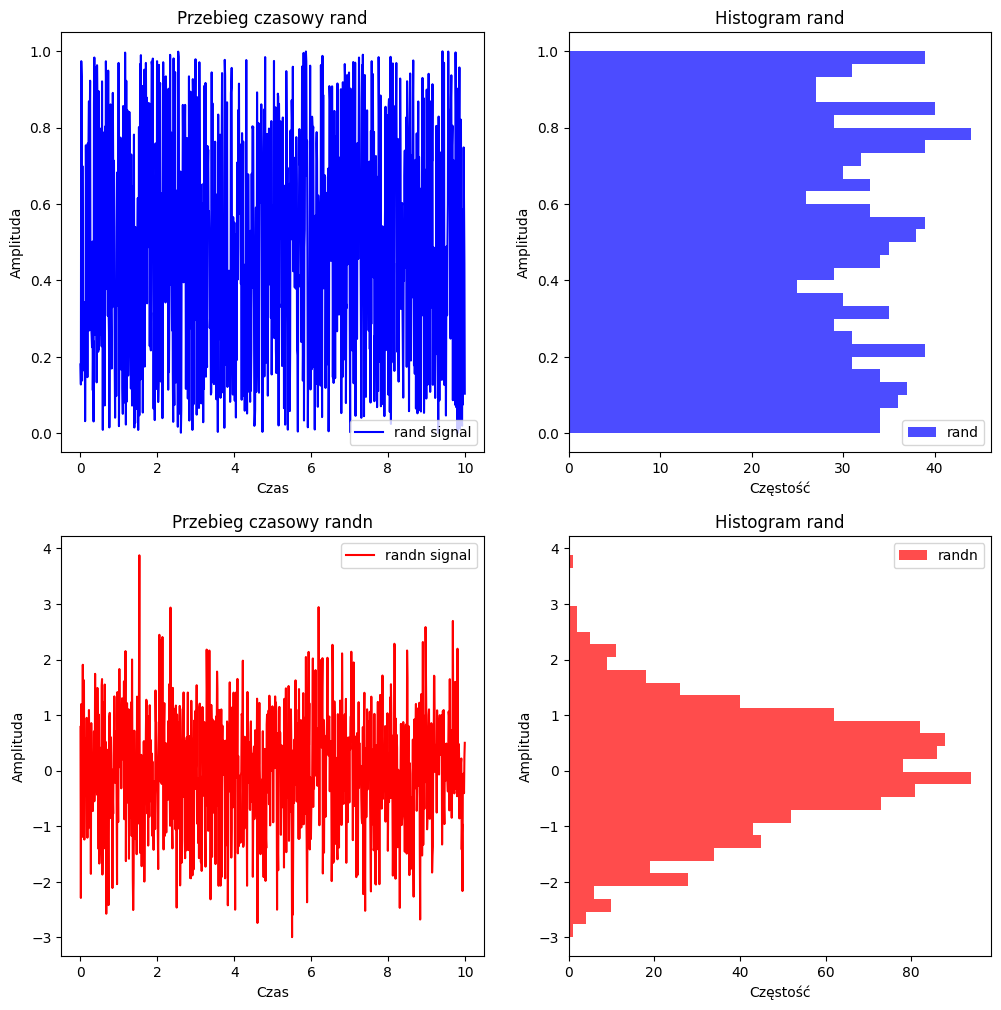

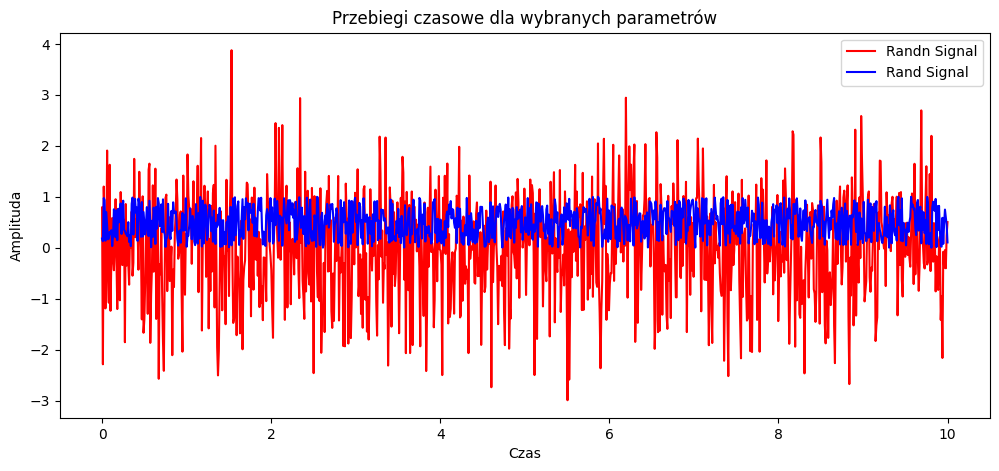

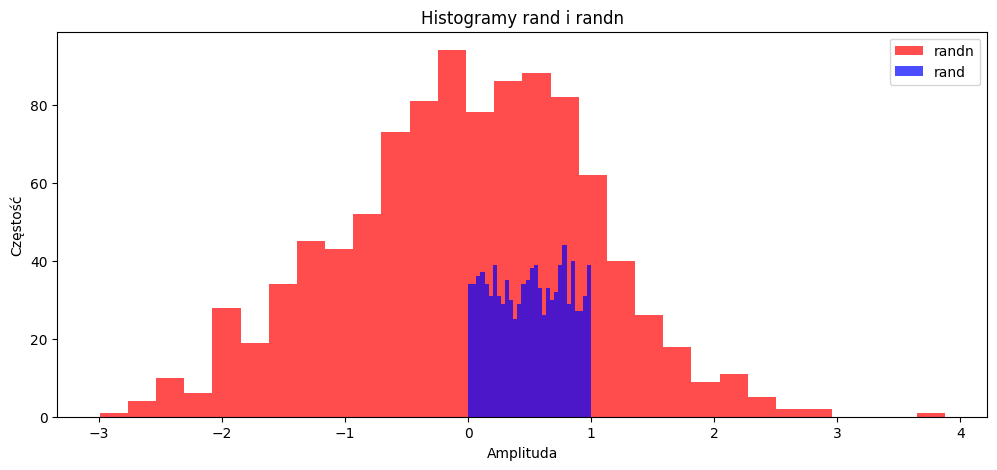

In [5]:
rand_signal = np.random.rand(1000)
randn_signal = np.random.randn(1000)
time_rand = np.linspace(0, 10, 1000)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(time_rand, rand_signal, label='rand signal', color='blue')
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebieg czasowy rand")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_rand, randn_signal, label='randn signal', color='red')
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebieg czasowy randn")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(rand_signal, bins=30, alpha=0.7, color='blue', label='rand', orientation='horizontal')
plt.xlabel('Częstość')
plt.ylabel("Amplituda")
plt.title("Histogram rand")
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(randn_signal, bins=30, alpha=0.7, color='red', label='randn', orientation='horizontal')
plt.xlabel('Częstość')
plt.ylabel("Amplituda")
plt.title("Histogram rand")
plt.legend()
plt.show()

signals = [randn_signal, rand_signal]
plt.figure(figsize=(12, 5))
for signal in signals:
    if signal is rand_signal:
        plt.plot(time_rand, signal, label="Rand Signal", color='blue')  # Etykieta dla rand_signal
    else:
        plt.plot(time_rand, signal, label="Randn Signal", color='red')  # Etykieta dla randn_signal
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebiegi czasowe dla wybranych parametrów")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for signal in signals:
    if signal is rand_signal:
        plt.hist(rand_signal, bins=30, alpha=0.7, color='blue', label='rand')  # Etykieta dla rand_signal
    else:
        plt.hist(randn_signal, bins=30, alpha=0.7, color='red', label='randn')
plt.xlabel("Amplituda")
plt.ylabel('Częstość')
plt.title("Histogramy rand i randn")
plt.legend()
plt.show()

### Zad. 5 
Korzystając z funkcji random.normal, która dostępna jest w bibliotece NumPy, wygeneruj kilka przebiegów czasowych dla wybranych parametrów. Wyznacz histogramy dla tych przebiegów. 

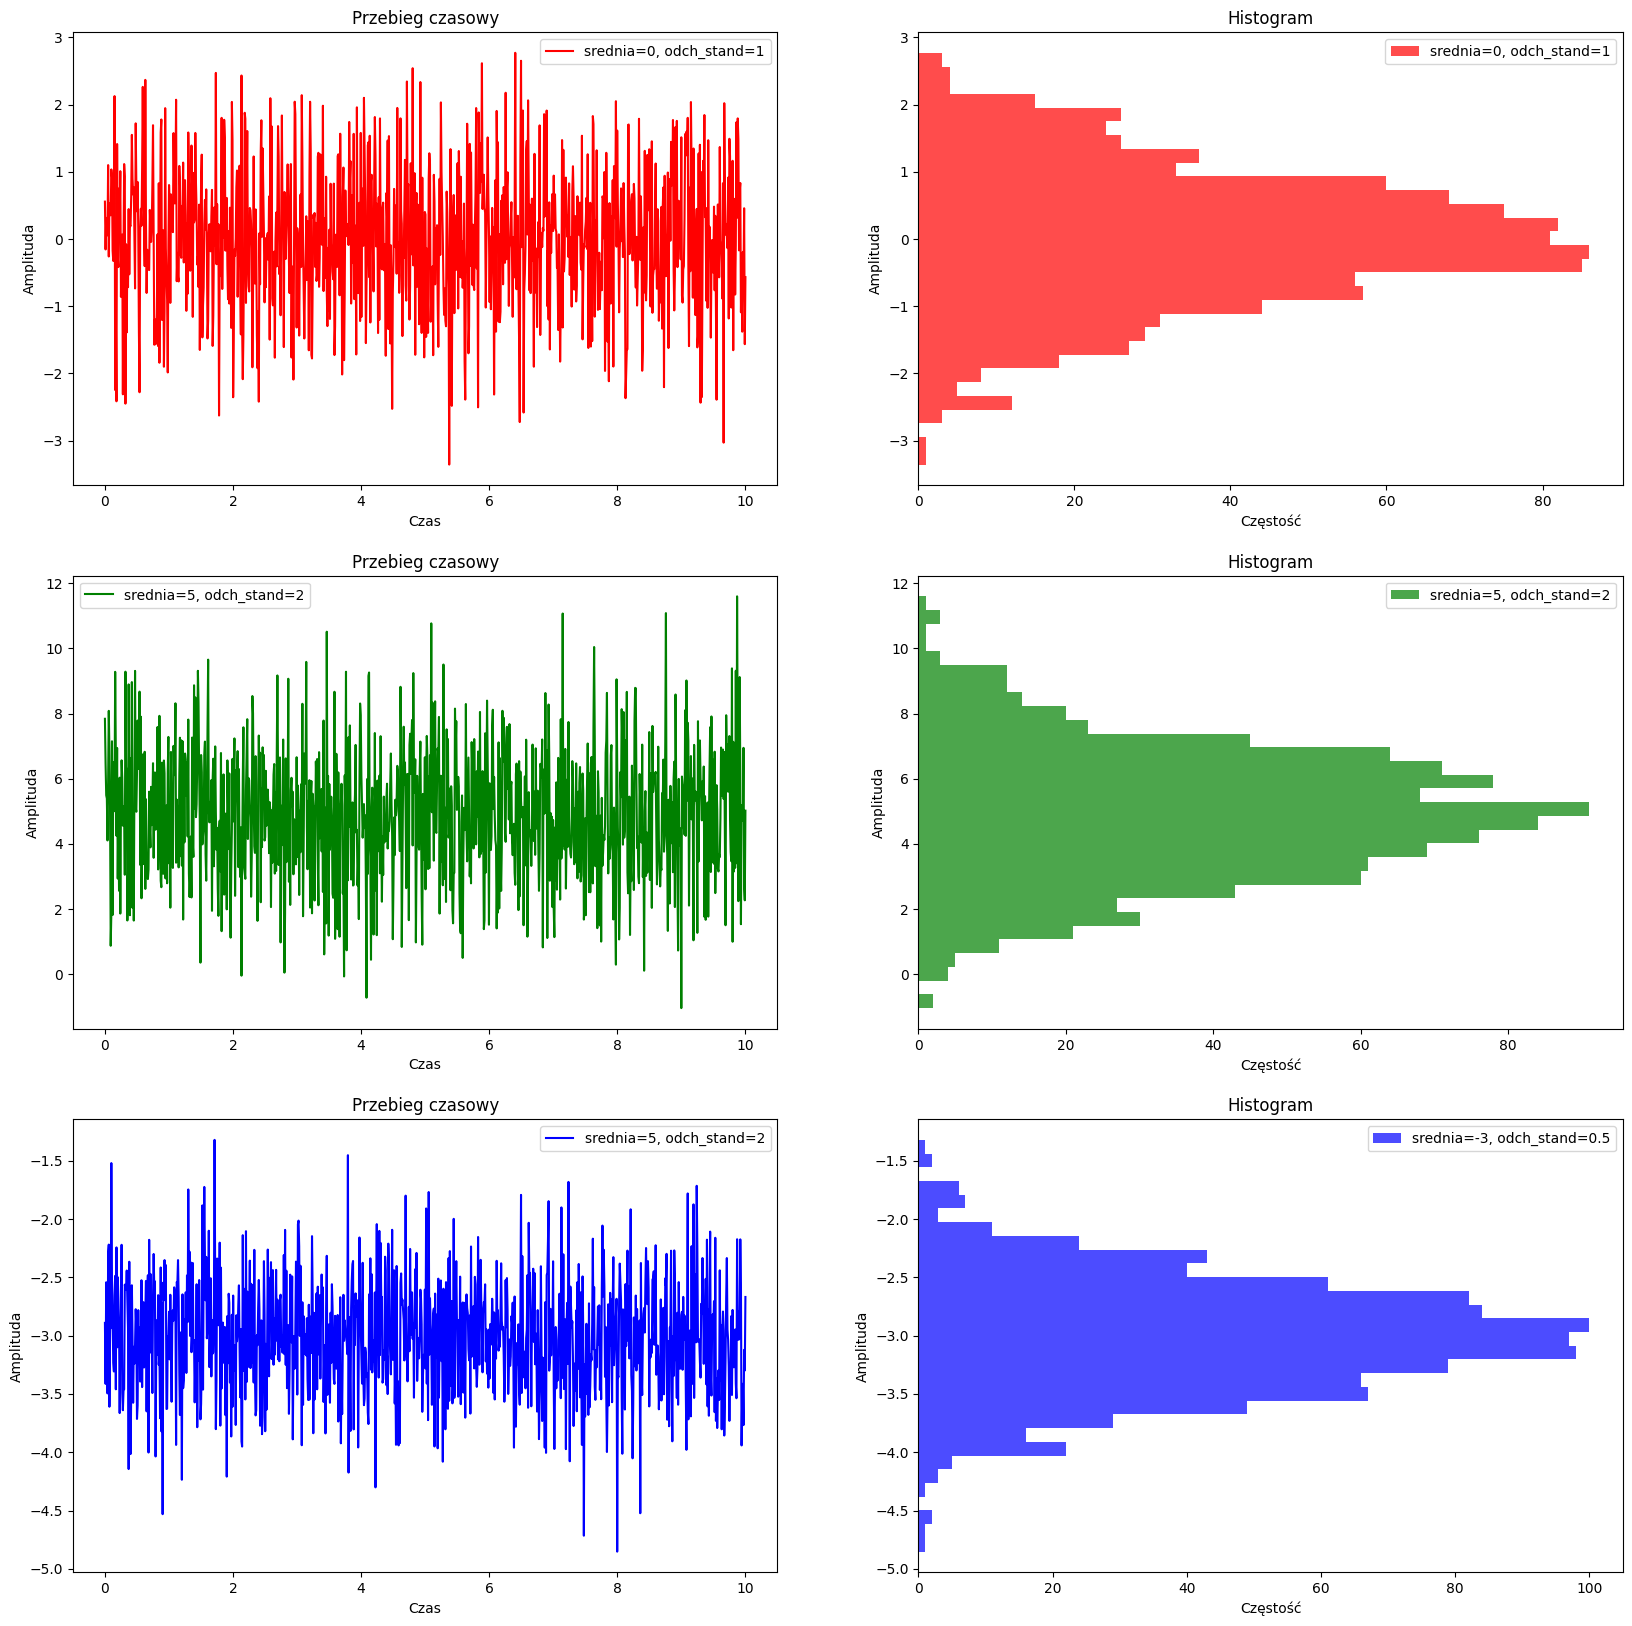

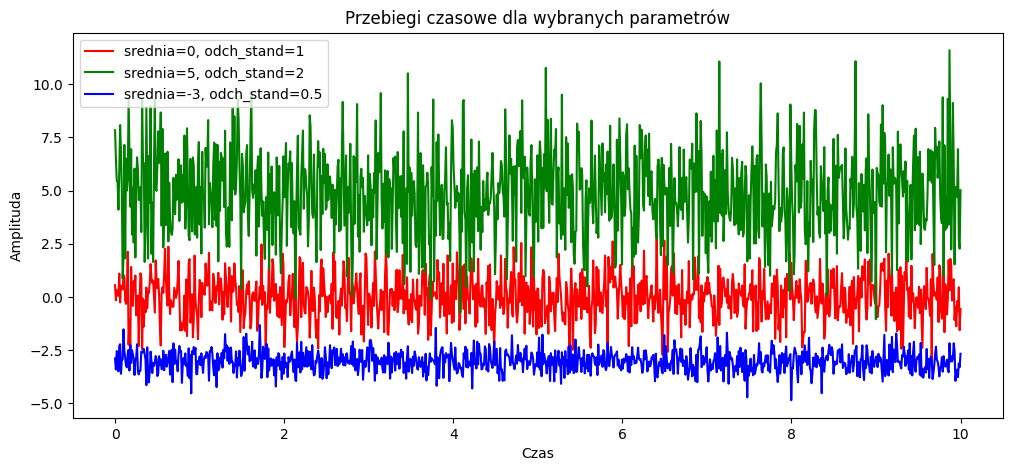

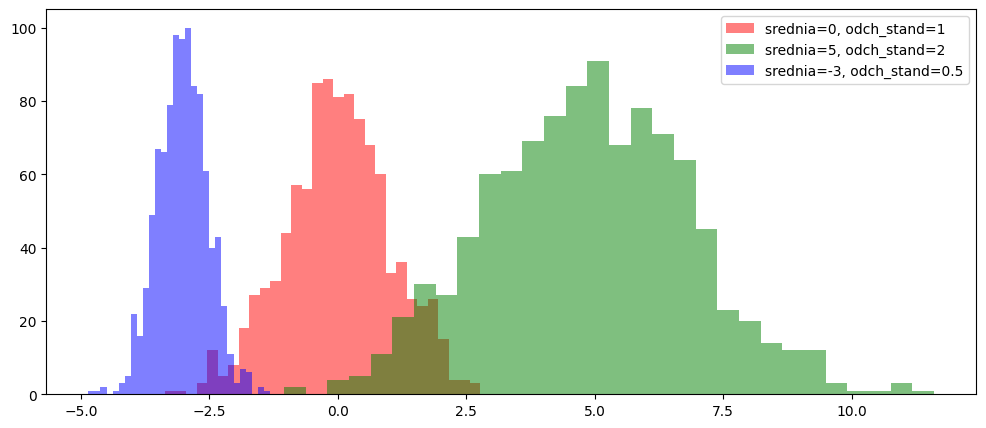

In [6]:
params = [(0, 1), (5, 2), (-3, 0.5)]
time_rand = np.linspace(0, 10, 1000)

signals = [np.random.normal(mean, std, 1000) for mean, std in params]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.plot(time_rand, signals[0], label=f'srednia={params[0][0]}, odch_stand={params[0][1]}', color=colors[0])
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebieg czasowy")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(time_rand, signals[1], label=f'srednia={params[1][0]}, odch_stand={params[1][1]}', color=colors[1])
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebieg czasowy")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(time_rand, signals[2], label=f'srednia={params[1][0]}, odch_stand={params[1][1]}', color=colors[2])
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebieg czasowy")
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(signals[0], bins=30, alpha=0.7, label=f'srednia={params[0][0]}, odch_stand={params[0][1]}', color=colors[0], orientation='horizontal')
plt.xlabel('Częstość')
plt.ylabel("Amplituda")
plt.title("Histogram")
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(signals[1], bins=30, alpha=0.7, label=f'srednia={params[1][0]}, odch_stand={params[1][1]}', color=colors[1], orientation='horizontal')
plt.xlabel('Częstość')
plt.ylabel("Amplituda")
plt.title("Histogram")
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(signals[2], bins=30, alpha=0.7, label=f'srednia={params[2][0]}, odch_stand={params[2][1]}', color=colors[2], orientation='horizontal')
plt.xlabel('Częstość')
plt.ylabel("Amplituda")
plt.title("Histogram")
plt.legend()
plt.show()


plt.figure(figsize=(12, 5))
for i in range(len(signals)):
    plt.plot(time_rand, signals[i], label=f'srednia={params[i][0]}, odch_stand={params[i][1]}', color=colors[i])
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.title("Przebiegi czasowe dla wybranych parametrów")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for i in range(len(signals)):
    plt.hist(signals[i], bins=30, alpha=0.5, label=f'srednia={params[i][0]}, odch_stand={params[i][1]}', color=colors[i])
plt.legend()
plt.show()

### Zad. 6 
Przygotuj kod w języku Python, który generuje szum czerwony (Browna). Wyświetl histogram dla tego szumu. 

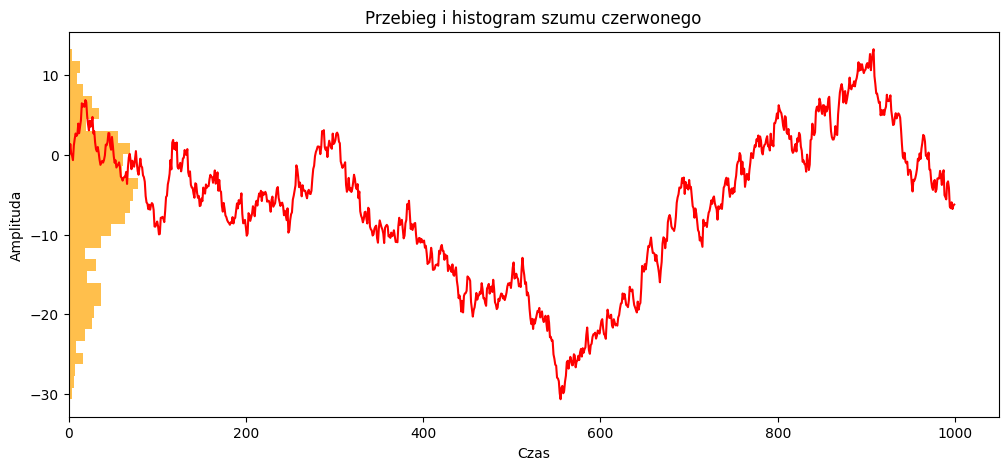

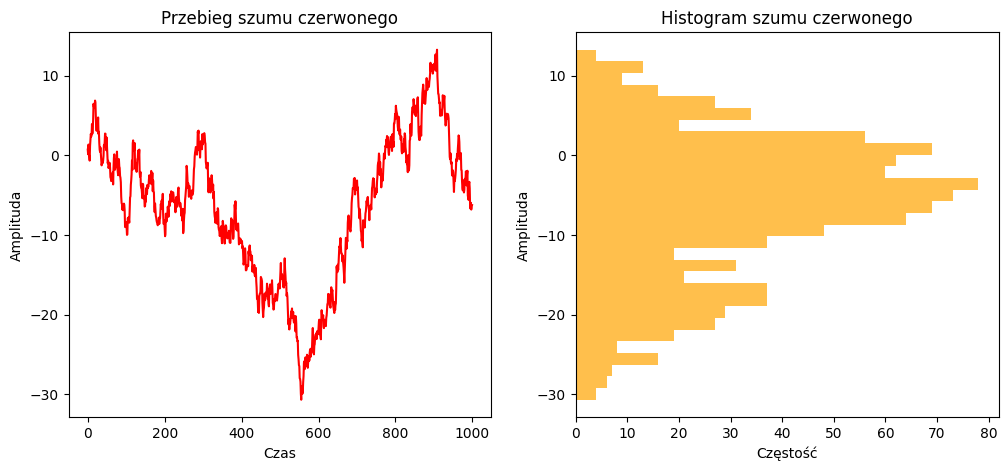

In [7]:
brownian = np.cumsum(np.random.randn(1000))
plt.figure(figsize=(12, 5))
plt.plot(brownian, color='red')
plt.hist(brownian, bins=30, color='orange', alpha=0.7, orientation='horizontal')
plt.title("Przebieg i histogram szumu czerwonego")
plt.xlabel("Czas")
plt.ylabel("Amplituda")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(brownian, color='red')
plt.title("Przebieg szumu czerwonego")
plt.xlabel("Czas")
plt.ylabel("Amplituda")

plt.subplot(1, 2, 2)
plt.hist(brownian, bins=30, color='orange', alpha=0.7, orientation='horizontal')
plt.title("Histogram szumu czerwonego")
plt.xlabel("Częstość")
plt.ylabel("Amplituda")
plt.show()

### Zad. 7 
Przygotuj kod w języku Python, który generuje dwuwymiarowy szum czerwony (Browna). Wyświetl wygenerowany przebieg na płaszczyźnie. 

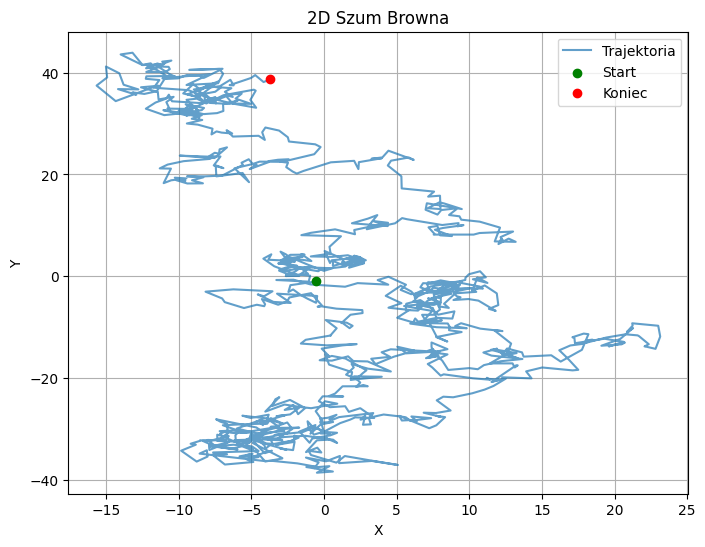

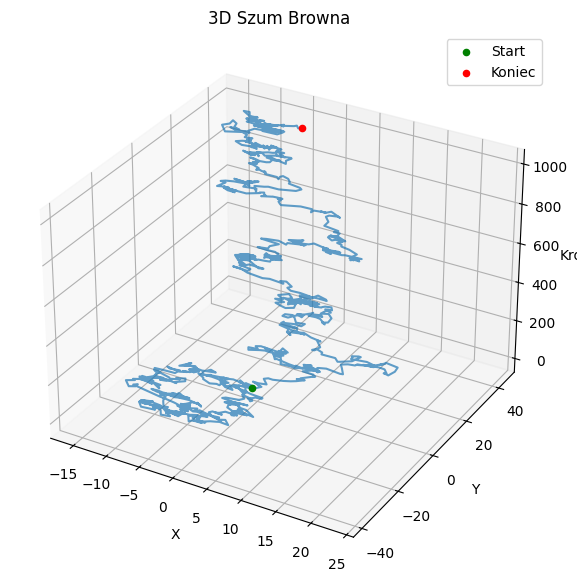

In [8]:
def brownian_motion_2d(n, delta=1):
    """
    Generuje dwuwymiarowy szum Browna.
    :param n: liczba kroków
    :param delta: skala odchylenia standardowego
    :return: trajektoria (x, y)
    """
    dX = np.random.normal(scale=delta, size=(n, 2))
    X = np.cumsum(dX, axis=0)
    return X[:, 0], X[:, 1]

# Parametry symulacji
num_steps = 1000

# Generowanie trajektorii
x, y = brownian_motion_2d(num_steps)

# Tworzenie wektora czasu
t = np.arange(num_steps)

# Wykres 2D
plt.figure(figsize=(8, 6))
plt.plot(x, y, alpha=0.7, label='Trajektoria')
plt.scatter([x[0]], [y[0]], color='green', label='Start', zorder=3)
plt.scatter([x[-1]], [y[-1]], color='red', label='Koniec', zorder=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('2D Szum Browna')
plt.grid()
plt.show()

# Wykres 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, t, alpha=0.7)
ax.scatter(x[0], y[0], t[0], color='green', label='Start')
ax.scatter(x[-1], y[-1], t[-1], color='red', label='Koniec')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Krok')
ax.set_title('3D Szum Browna')
plt.legend()
plt.show()
